<a href="https://colab.research.google.com/github/yunah02/1/blob/main/%ED%95%B4%EC%BB%A4%ED%86%A42.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 패키지 설치

EDA를 시작하기에 앞서 필요한 패키지들을 설치합니다.

In [159]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install sklearn

##랜덤시드 고정

In [160]:
import random

In [161]:
random.seed(42)

##데이터 파악 및 EDA 탐색적 분석
- 기초통계를 이용한 분석
- 시각화를 이용한 분석

```



# 기초통계를 통한 분석

In [162]:
import numpy as np
import pandas as pd

In [163]:
train = pd.read_csv('train_final.csv')
train = train.drop('id', axis=1)

In [164]:
#데이터 앞 쪽 보기
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,Male,Loyal Customer,72,Business travel,Business,1784,1,1,4,1,...,2,2,3,2,5,2,0,0,0,1
1,Male,Loyal Customer,35,Business travel,Business,2228,2,5,5,5,...,2,2,2,2,4,2,0,0,8,0
2,Male,disloyal Customer,37,Business travel,Eco,1970,4,3,4,1,...,1,3,2,5,1,4,0,1,2,1
3,Female,Loyal Customer,20,Personal Travel,Eco,2249,5,5,1,3,...,1,4,1,4,1,5,0,0,0,1
4,Male,disloyal Customer,38,Business travel,Eco,1995,2,2,2,2,...,5,2,5,3,1,2,0,110,102,0


In [165]:
#데이터 끝 쪽 보기
train.tail()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
2994,Female,Loyal Customer,38,Personal Travel,Eco,2085,3,3,3,3,...,2,2,2,2,4,2,1,0,2,1
2995,Male,Loyal Customer,58,Business travel,Business,614,1,1,1,1,...,1,1,1,1,3,1,3,13,8,0
2996,Male,Loyal Customer,42,Business travel,Business,2207,4,5,5,5,...,4,4,4,4,3,4,4,0,20,0
2997,Male,Loyal Customer,46,Personal Travel,Eco,1486,3,4,3,3,...,1,4,4,3,3,4,1,0,0,0
2998,Male,Loyal Customer,47,Business travel,Business,460,5,5,5,5,...,4,4,4,4,4,4,5,0,0,1


##코드 숫자형으로 바꾸기

In [200]:
train_x = train.drop(["target"],axis=1)
train_y = train.target

#라벨인코딩을 하기 위함 dictionary map 생성 함수
def make_label_map(dataframe):
    label_maps = {}
    for col in dataframe.columns:
        if dataframe[col].dtype=='object':
            label_map = {'unknown':0}
            for i, key in enumerate(dataframe[col].unique()): #enumerate는 인덱스와 함께 고유값 반환, enumerate(['a', 'b', 'c'])는 (0, 'a'), (1, 'b'), (2, 'c')와 같은 튜플을 반환
                label_map[key] = i+1
            label_maps[col] = label_map
    return label_maps

# 각 범주형 변수에 인코딩 값을 부여하는 함수
def label_encoder(dataframe, label_map):
    for col in dataframe.columns:
        if dataframe[col].dtype=='object':
            dataframe[col] = dataframe[col].map(label_map[col])
            dataframe[col] = dataframe[col].fillna(label_map[col]['unknown'])
    return dataframe

# train 데이터 라벨 인코딩
label_map = make_label_map(train_x) # train 사용해 label map 생성
train_x = label_encoder(train_x, label_map) # train 라벨 인코딩

train_x.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,1,72,1,1,1784,1,1,4,1,...,5,2,2,3,2,5,2,0,0,0
1,1,1,35,1,1,2228,2,5,5,5,...,2,2,2,2,2,4,2,0,0,8
2,1,2,37,1,2,1970,4,3,4,1,...,1,1,3,2,5,1,4,0,1,2
3,2,1,20,2,2,2249,5,5,1,3,...,1,1,4,1,4,1,5,0,0,0
4,1,2,38,1,2,1995,2,2,2,2,...,5,5,2,5,3,1,2,0,110,102


In [167]:
train_x.tail()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
2994,2,1,38,2,2,2085,3,3,3,3,...,5,2,2,2,2,4,2,1,0,2
2995,1,1,58,1,1,614,1,1,1,1,...,4,1,1,1,1,3,1,3,13,8
2996,1,1,42,1,1,2207,4,5,5,5,...,2,4,4,4,4,3,4,4,0,20
2997,1,1,46,2,2,1486,3,4,3,3,...,1,1,4,4,3,3,4,1,0,0
2998,1,1,47,1,1,460,5,5,5,5,...,5,4,4,4,4,4,4,5,0,0


In [169]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##데이터 정보 수정(문자열, 숫자열)

In [170]:
#데이터 정보 보기
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Gender                             2999 non-null   int64
 1   Customer Type                      2999 non-null   int64
 2   Age                                2999 non-null   int64
 3   Type of Travel                     2999 non-null   int64
 4   Class                              2999 non-null   int64
 5   Flight Distance                    2999 non-null   int64
 6   Seat comfort                       2999 non-null   int64
 7   Departure/Arrival time convenient  2999 non-null   int64
 8   Food and drink                     2999 non-null   int64
 9   Gate location                      2999 non-null   int64
 10  Inflight wifi service              2999 non-null   int64
 11  Inflight entertainment             2999 non-null   int64
 12  Online support      

In [171]:
#데이터 모양 보기
print(train_x.shape)

(2999, 22)


In [172]:
#숫자형 데이터 평균값 보기
print(train_x.mean)

<bound method DataFrame.mean of       Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0          1              1   72               1      1             1784   
1          1              1   35               1      1             2228   
2          1              2   37               1      2             1970   
3          2              1   20               2      2             2249   
4          1              2   38               1      2             1995   
...      ...            ...  ...             ...    ...              ...   
2994       2              1   38               2      2             2085   
2995       1              1   58               1      1              614   
2996       1              1   42               1      1             2207   
2997       1              1   46               2      2             1486   
2998       1              1   47               1      1              460   

      Seat comfort  Departure/Arrival time convenient  

In [173]:
#변수별 표준편차
train_x.std()

,0
Gender,0.500045
Customer Type,0.389222
Age,15.192597
Type of Travel,0.460244
Class,0.623113
Flight Distance,1010.887709
Seat comfort,1.395079
Departure/Arrival time convenient,1.528762
Food and drink,1.454290
Gate location,1.305669


In [174]:
#column별로 null값 구하기 (.sum 하나 더 붙여서 한번 더 검사)
train_x.isnull().sum().sum

<bound method Series.sum of Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64>

In [175]:
train_x.describe()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,...,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000
mean,1.506169,1.186062,39.578193,1.304435,1.576859,1970.913971,2.820940,2.966656,2.866622,3.005669,...,3.527176,3.489496,3.495498,3.507503,3.713571,3.349116,3.721574,3.361787,14.520840,15.054018
std,0.500045,0.389222,15.192597,0.460244,0.623113,1010.887709,1.395079,1.528762,1.454290,1.305669,...,1.311866,1.297791,1.252841,1.294724,1.140111,1.240504,1.141216,1.307399,34.447669,35.426230
min,1.000000,1.000000,7.000000,1.000000,1.000000,55.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,27.000000,1.000000,1.000000,1344.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,2.000000,1.000000,40.000000,1.000000,2.000000,1939.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,2.000000,1.000000,51.000000,2.000000,2.000000,2554.500000,4.000000,4.000000,4.000000,4.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,2.000000,2.000000,80.000000,2.000000,3.000000,6588.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,435.000000,470.000000


In [176]:
train_x['Type of Travel'].unique()

array([1, 2])

In [177]:
train_x['Type of Travel'].value_counts()

,count
Type of Travel,
1,2086
2,913


In [178]:
train_x['Type of Travel'].dtype

dtype('int64')

#시각화를 통한 분석

In [179]:
import matplotlib.pyplot as plt

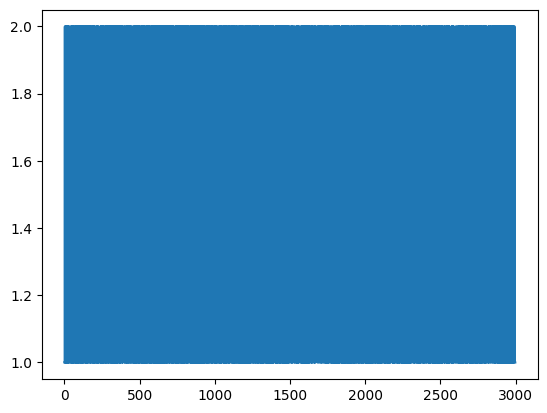

In [180]:
plt.plot(train_x['Gender'])

(array([1481.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1518.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <BarContainer object of 10 artists>)

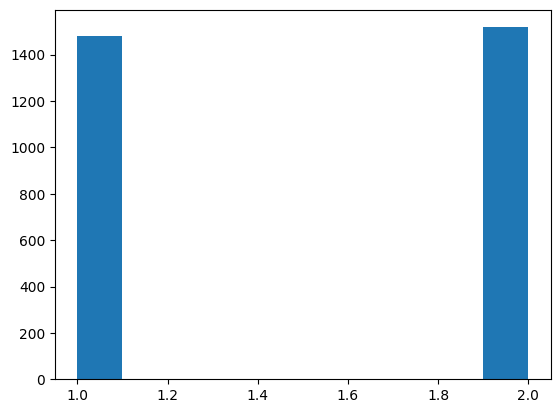

In [181]:
plt.hist(train_x['Gender'])

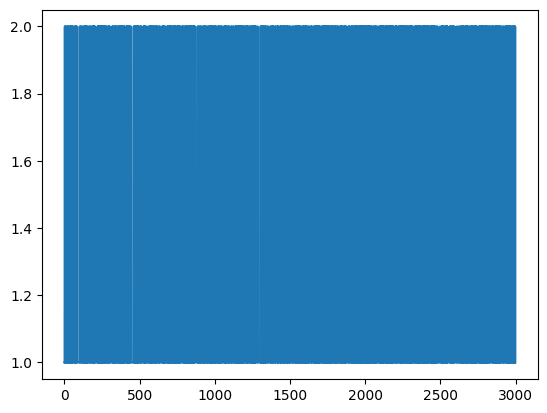

In [143]:
plt.plot(train_x['Type of Travel'])

(array([2086.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         913.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <BarContainer object of 10 artists>)

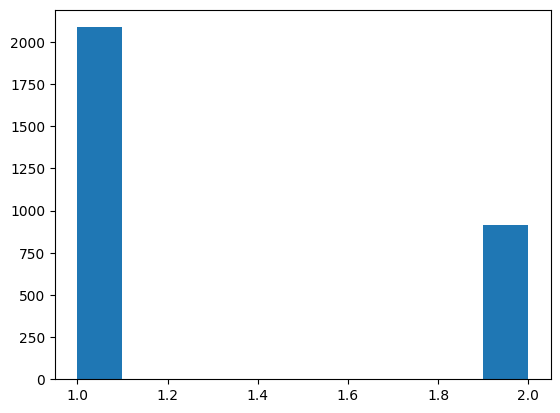

In [144]:
plt.hist(train_x['Type of Travel'])

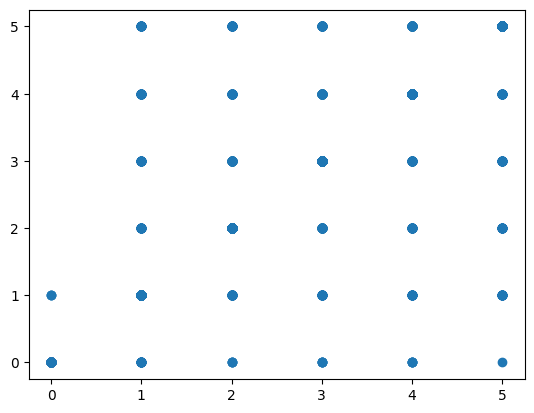

In [148]:
# 산점도 나타내기
plt.scatter(train_x['Seat comfort'],train_x['Food and drink'])

<Axes: >

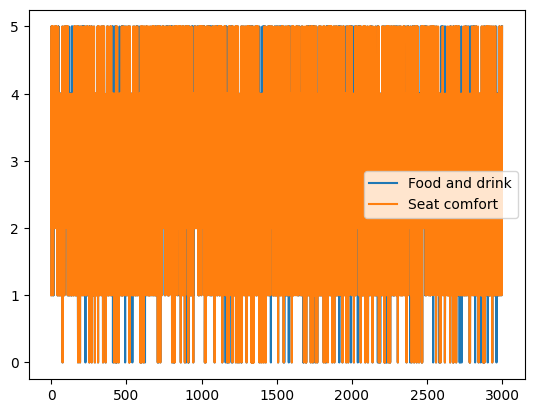

In [146]:
train_x[['Food and drink', 'Seat comfort']].plot()

<Axes: >

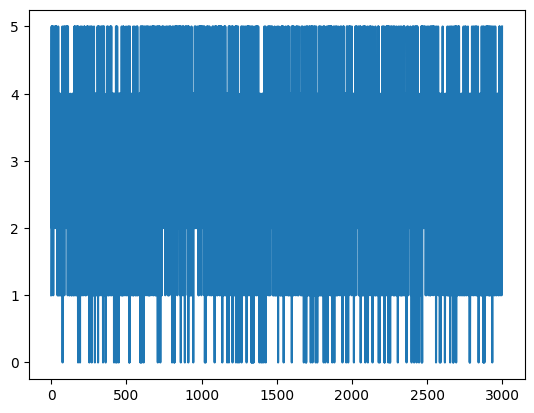

In [147]:
train_x['Seat comfort'].plot()

##decision tree 만들기

In [192]:
import pandas as pd
train_x_final_csv = pd.read_csv('train_final.csv')
X = train_x_final_csv.drop('target', axis=1)  # 타겟 열을 제외한 모든 열
y = train_x_final_csv['target']  # 타겟 열

In [195]:
# 데이터 로드
train_x_final_csv = pd.read_csv('train_final.csv')

In [199]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from subprocess import check_call

# 데이터 로드
train_x_final_csv = pd.read_csv('train_final.csv')

# 'target' 열의 데이터 타입 확인
print(train_x_final_csv['target'].dtype)
print(train_x_final_csv['target'].unique())

# 'target' 열의 값을 정제 및 변환
train_x_final_csv['target'] = train_x_final_csv['target'].str.strip().str.lower()
gender_map = {'male': 0, 'female': 1}
train_x_final_csv['target'] = train_x_final_csv['target'].map(gender_map)

# 데이터 타입을 명시적으로 변경
train_x_final_csv['target'] = train_x_final_csv['target'].astype(int)

# 변환 후 데이터 타입 및 유니크 값 확인
print(train_x_final_csv['target'].dtype)
print(train_x_final_csv['target'].unique())




int64
[1 0]


AttributeError: Can only use .str accessor with string values!

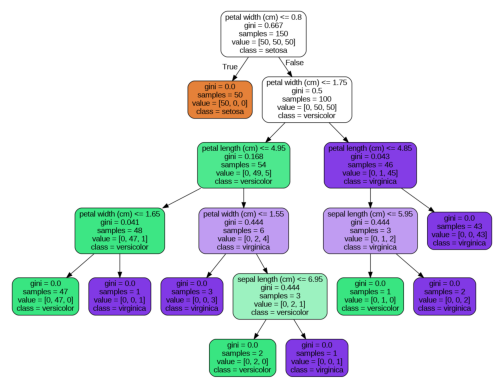

In [187]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('tree.png')
plt.imshow(img)
plt.axis('off')  # 축 제거
plt.show()